<ipython-input-6-c3ed1579785a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = voter_data.groupby('Voter Group').agg({


  Voter Group  Number of Counties  Total Registered Voters  Total Votes Cast  \
0         <5K                  22                    71420             38128   
1      5K-10K                  31                   209721            115996   
2     10K-20K                  44                   620832            346121   
3     20K-50K                  30                   865995            470269   
4    50K-100K                  15                  1033202            563493   
5       >100K                  16                  3411471           2024617   

   Average Percent Voted  
0              54.209091  
1              55.222581  
2              55.518182  
3              54.553333  
4              54.333333  
5              58.450000  


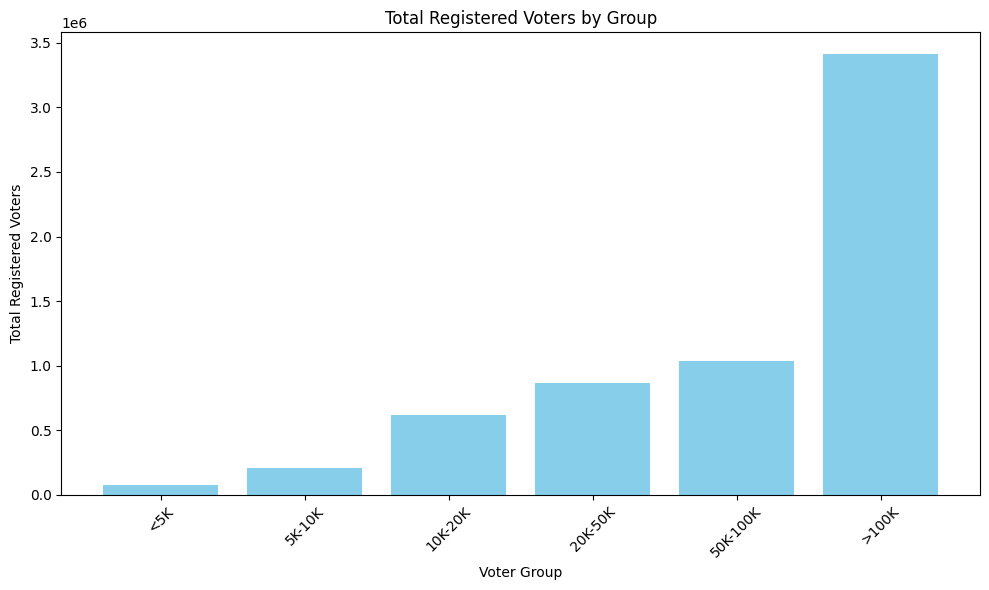

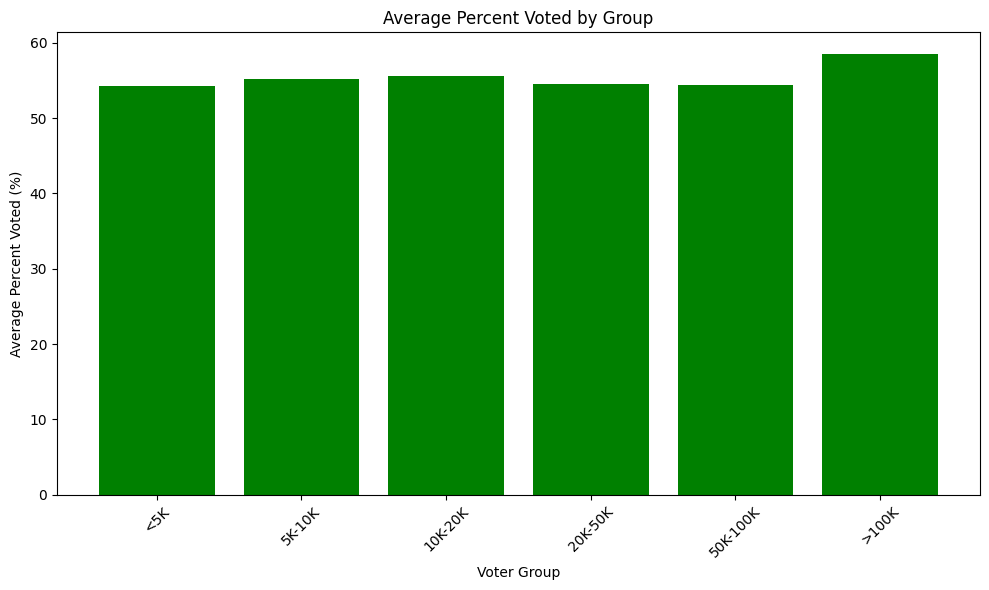

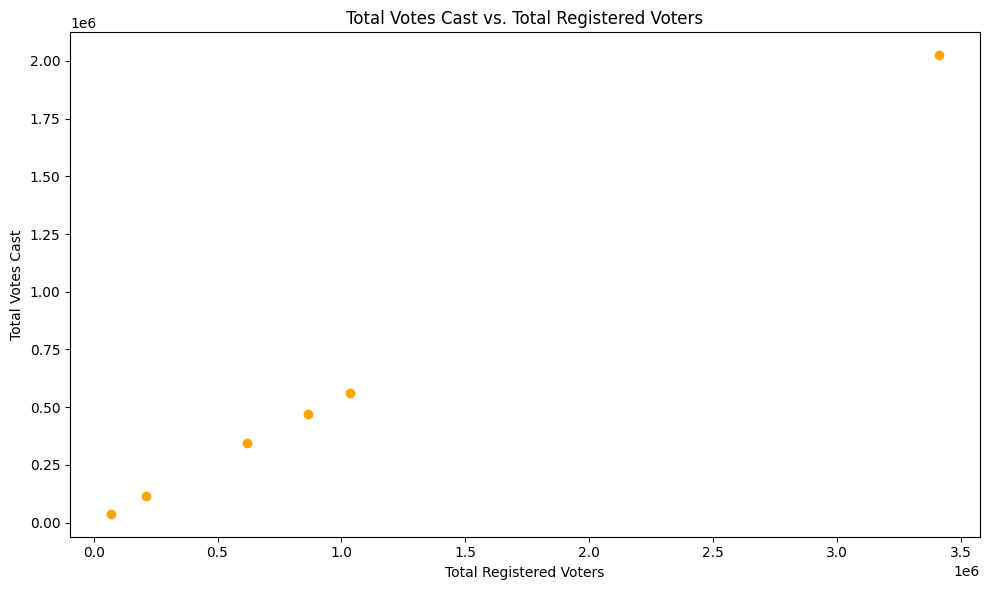

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/sample_data/coterturnoutpercounty.csv'
voter_data = pd.read_csv(file_path)

voter_data['Registered Voters'] = voter_data['Registered Voters'].str.replace(',', '').astype(int)
voter_data['Total Voted'] = voter_data['Total Voted'].str.replace(',', '').astype(int)
voter_data['Percent Voted'] = voter_data['Percent Voted'].str.replace('%', '').astype(float)

bins = [0, 5000, 10000, 20000, 50000, 100000, voter_data['Registered Voters'].max()]
labels = ['<5K', '5K-10K', '10K-20K', '20K-50K', '50K-100K', '>100K']
voter_data['Voter Group'] = pd.cut(voter_data['Registered Voters'], bins=bins, labels=labels, right=False)
grouped_data = voter_data.groupby('Voter Group').agg({
    'County': 'count',
    'Registered Voters': 'sum',
    'Total Voted': 'sum',
    'Percent Voted': 'mean'
}).reset_index()

grouped_data = grouped_data.rename(columns={
    'County': 'Number of Counties',
    'Registered Voters': 'Total Registered Voters',
    'Total Voted': 'Total Votes Cast',
    'Percent Voted': 'Average Percent Voted'
})
print(grouped_data)

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Voter Group'], grouped_data['Total Registered Voters'], color='skyblue')
plt.title('Total Registered Voters by Group')
plt.xlabel('Voter Group')
plt.ylabel('Total Registered Voters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Voter Group'], grouped_data['Average Percent Voted'], color='green')
plt.title('Average Percent Voted by Group')
plt.xlabel('Voter Group')
plt.ylabel('Average Percent Voted (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Total Registered Voters'], grouped_data['Total Votes Cast'], color='orange')
plt.title('Total Votes Cast vs. Total Registered Voters')
plt.xlabel('Total Registered Voters')
plt.ylabel('Total Votes Cast')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

file_path = '/content/sample_data/medianincome.csv'
income_data = pd.read_csv(file_path)

income_data = income_data.rename(columns={'Value (Dollars)': 'Median_Income'})
income_data['Median_Income'] = income_data['Median_Income'].str.replace(',', '').astype(float)

bins = pd.qcut(income_data['Median_Income'], q=8, duplicates='drop')
income_data['Income Group'] = bins

grouped_income_data = income_data.groupby('Income Group').agg({
    'County': 'count',
    'Median_Income': ['min', 'max', 'mean']
}).reset_index()

grouped_income_data.columns = ['Income Group', 'Number of Counties', 'Min Income', 'Max Income', 'Average Income']
print(grouped_income_data)
grouped_income_data.to_csv('grouped_income_data.csv', index=False)

# variance
# x bar
#
# income vs voting early 65,364
# income voting by mail


            Income Group  Number of Counties  Min Income  Max Income  \
0  (34812.999, 54255.25]                  20     34813.0     54115.0   
1    (54255.25, 58701.0]                  20     54302.0     58229.0   
2    (58701.0, 62791.75]                  20     59173.0     62701.0   
3    (62791.75, 67163.0]                  20     63064.0     67163.0   
4    (67163.0, 71360.75]                  19     67549.0     70895.0   
5    (71360.75, 79668.0]                  20     71516.0     79624.0   
6     (79668.0, 91492.0]                  20     79712.0     91406.0   
7    (91492.0, 144747.0]                  20     91750.0    144747.0   

   Average Income  
0    49800.650000  
1    56147.700000  
2    60927.000000  
3    64870.700000  
4    69137.263158  
5    74998.350000  
6    83989.100000  
7   105773.500000  


<ipython-input-8-1752c40f8348>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_income_data = income_data.groupby('Income Group').agg({


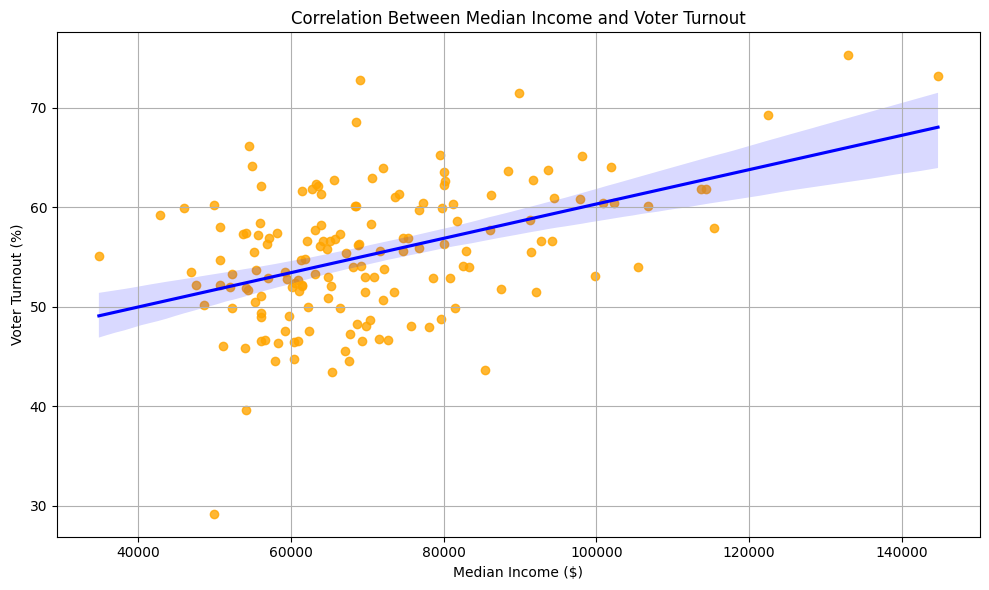

Correlation Coefficient: 0.45


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

income_file_path = '/content/sample_data/medianincome.csv'
voter_file_path = '/content/sample_data/coterturnoutpercounty.csv'

income_data = pd.read_csv(income_file_path)
voter_data = pd.read_csv(voter_file_path)

income_data = income_data.rename(columns={'Value (Dollars)': 'Median_Income'})
income_data['Median_Income'] = income_data['Median_Income'].str.replace(',', '').astype(float)
income_data['County'] = income_data['County'].str.strip().str.upper()

voter_data['Registered Voters'] = voter_data['Registered Voters'].str.replace(',', '').astype(int)
voter_data['Total Voted'] = voter_data['Total Voted'].str.replace(',', '').astype(int)
voter_data['Percent Voted'] = voter_data['Percent Voted'].str.replace('%', '').astype(float)
voter_data['County'] = voter_data['County'].str.strip().str.upper()

merged_data = pd.merge(
    income_data[['County', 'Median_Income']],
    voter_data[['County', 'Percent Voted']],
    on='County',
    how='inner'
)

plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, x='Median_Income', y='Percent Voted', scatter_kws={'color': 'orange'}, line_kws={'color': 'blue'})
plt.title('Correlation Between Median Income and Voter Turnout')
plt.xlabel('Median Income ($)')
plt.ylabel('Voter Turnout (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_coefficient = merged_data['Median_Income'].corr(merged_data['Percent Voted'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")




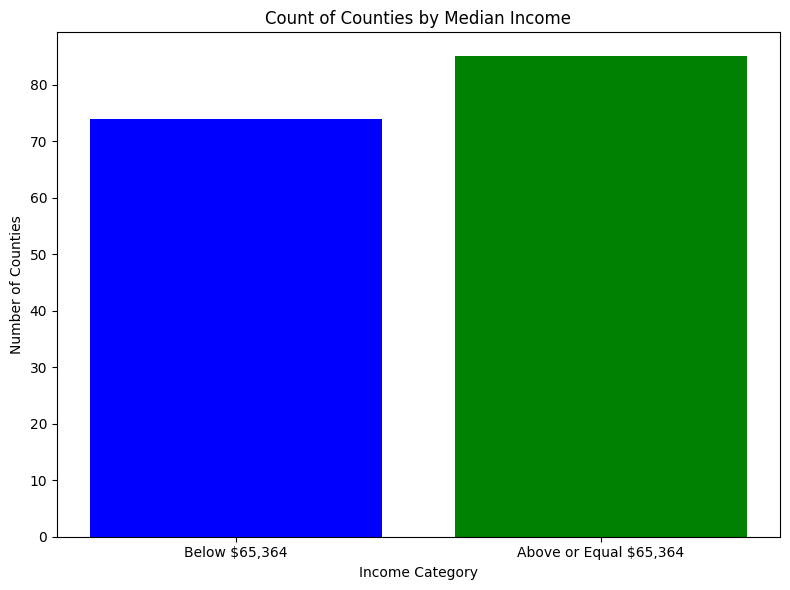

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/sample_data/medianincome.csv'

data = pd.read_csv(file_path)

column_name = 'Value (Dollars)'

data[column_name] = data[column_name].str.replace(',', '', regex=True)
data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

threshold = 65364

below_count = len(data[data[column_name] < threshold])
above_or_equal_count = len(data[data[column_name] >= threshold])

categories = ['Below $65,364', 'Above or Equal $65,364']
counts = [below_count, above_or_equal_count]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.title('Count of Counties by Median Income')
plt.xlabel('Income Category')
plt.ylabel('Number of Counties')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

file_path = '/content/sample_data/medianincome.csv'

data = pd.read_csv(file_path)

column_name = 'Value (Dollars)'

data[column_name] = data[column_name].str.replace(',', '', regex=True)
data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

threshold = 65364

below_threshold = data[data[column_name] < threshold]
above_threshold = data[data[column_name] >= threshold]

variance_below = below_threshold[column_name].var()
variance_above = above_threshold[column_name].var()

print(f"The variance for counties with median income below {threshold} is: {variance_below}")
print(f"The variance for counties with median income above or equal to {threshold} is: {variance_above}")


The variance for counties with median income below 65364 is: 34895725.181969635
The variance for counties with median income above or equal to 65364 is: 254142987.31428564


In [ ]:
import pandas as pd
import numpy as np

file_path = '/content/sample_data/medianincome.csv'

data = pd.read_csv(file_path)

column_name = 'Value (Dollars)'

data[column_name] = data[column_name].str.replace(',', '', regex=True)
data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

threshold = 65364

below_threshold = data[data[column_name] < threshold]
above_threshold = data[data[column_name] >= threshold]

mean_below = below_threshold[column_name].mean()
mean_above = above_threshold[column_name].mean()

variance_below = below_threshold[column_name].var()
variance_above = above_threshold[column_name].var()

n_below = below_threshold.shape[0]
n_above = above_threshold.shape[0]

null_hypothesis_diff = 0

z_0 = (mean_above - mean_below - null_hypothesis_diff) / np.sqrt((variance_above / n_above) + (variance_below / n_below))

print(f"Mean Below Threshold: {mean_below}")
print(f"Mean Above Threshold: {mean_above}")
print(f"Variance Below Threshold: {variance_below}")
print(f"Variance Above Threshold: {variance_above}")
print(f"Sample Size Below Threshold: {n_below}")
print(f"Sample Size Above Threshold: {n_above}")
print(f"Z_0: {z_0}")


Mean Below Threshold: 57249.55405405405
Mean Above Threshold: 82438.6
Variance Below Threshold: 34895725.181969635
Variance Above Threshold: 254142987.31428564
Sample Size Below Threshold: 74
Sample Size Above Threshold: 85
Z_0: 13.538817074997802


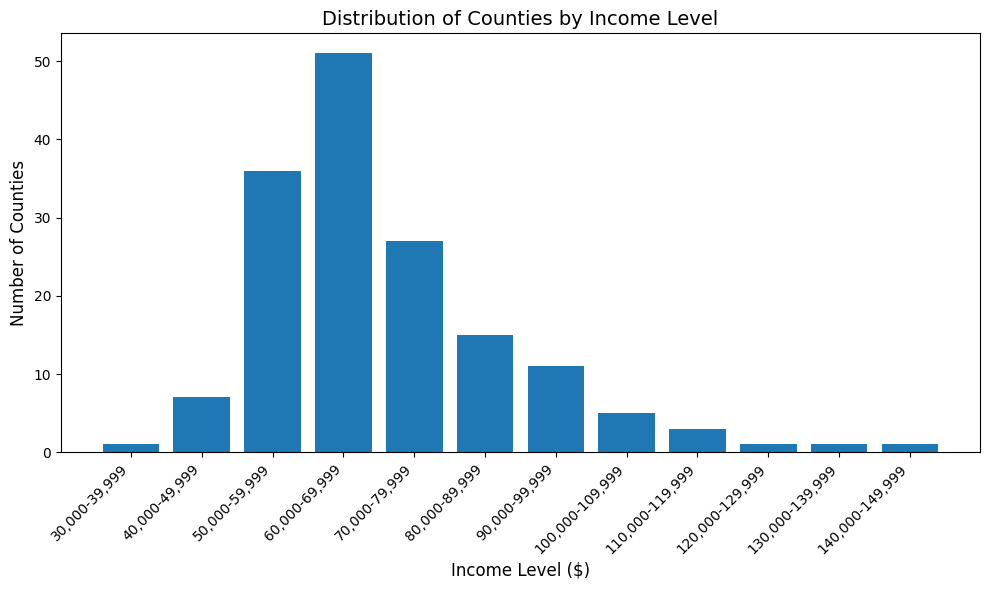

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/sample_data/medianincome.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Clean the data by focusing on the relevant income column and converting it to numeric
data = data[['Value (Dollars)']].dropna()
data['Value (Dollars)'] = data['Value (Dollars)'].str.replace(',', '').astype(float)

# Define income bins and labels based on the table in the image
bins = [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000]
labels = [
    '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999',
    '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-109,999',
    '110,000-119,999', '120,000-129,999', '130,000-139,999', '140,000-149,999'
]

# Categorize the income data into these bins
data['Income Level'] = pd.cut(data['Value (Dollars)'], bins=bins, labels=labels, right=False)

# Count the number of entries in each bin for the distribution
distribution = data['Income Level'].value_counts(sort=False)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(distribution.index.astype(str), distribution.values)
plt.xlabel('Income Level ($)', fontsize=12)
plt.ylabel('Number of Counties', fontsize=12)
plt.title('Distribution of Counties by Income Level', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


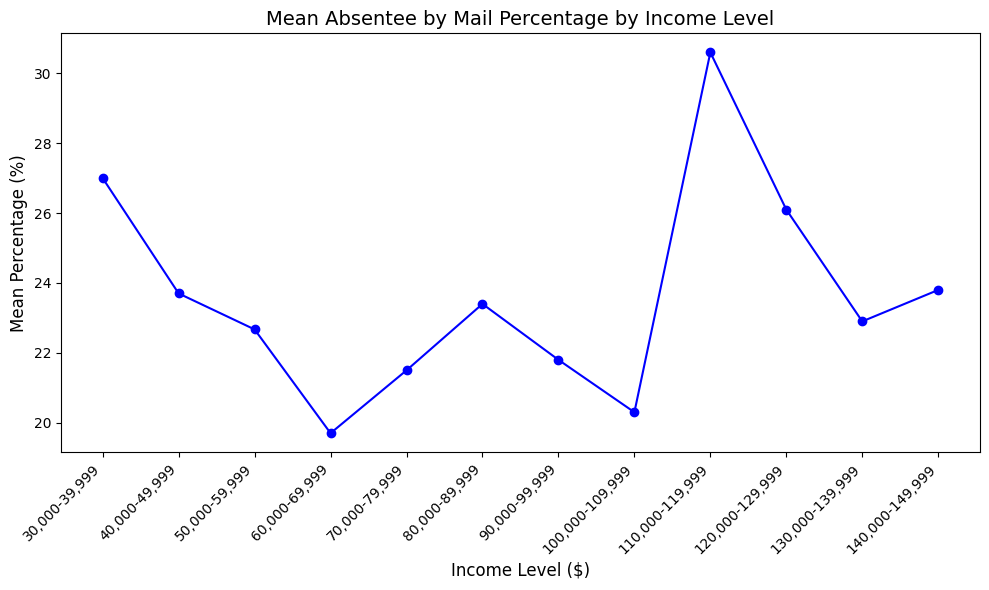

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {
    "Income Level": [
        "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999",
        "70,000-79,999", "80,000-89,999", "90,000-99,999", "100,000-109,999",
        "110,000-119,999", "120,000-129,999", "130,000-139,999", "140,000-149,999"
    ],
    "Mean (%)": [
        27.0, 23.7, 22.67, 19.7, 21.5, 23.4, 21.8, 20.3,
        30.6, 26.1, 22.9, 23.8
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df["Income Level"], df["Mean (%)"], marker='o', linestyle='-', color='blue')
plt.title('Mean Absentee by Mail Percentage by Income Level', fontsize=14)
plt.xlabel('Income Level ($)', fontsize=12)
plt.ylabel('Mean Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


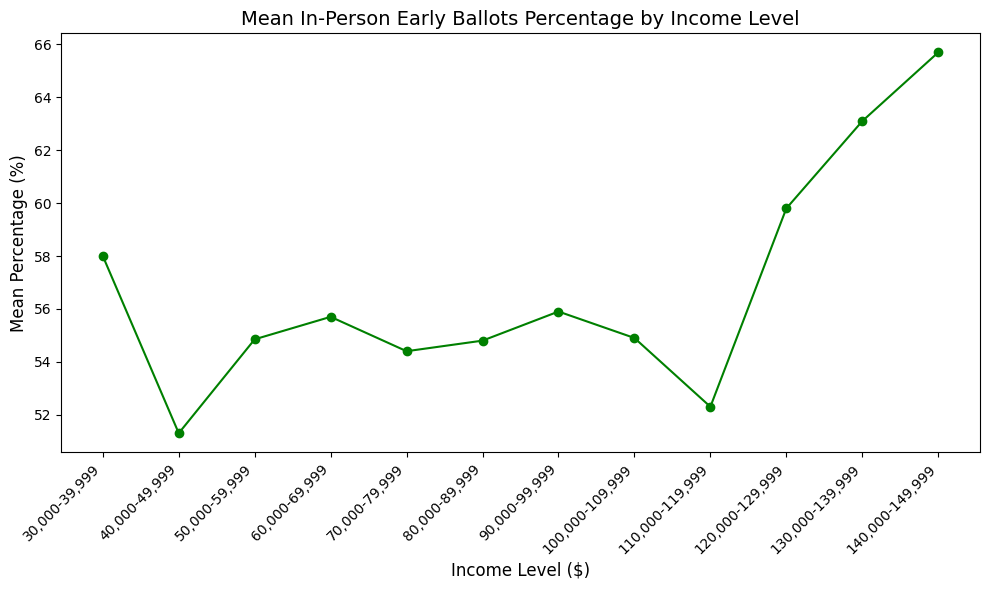

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data from the new table as a dictionary
new_table_data = {
    "Income Level": [
        "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999",
        "70,000-79,999", "80,000-89,999", "90,000-99,999", "100,000-109,999",
        "110,000-119,999", "120,000-129,999", "130,000-139,999", "140,000-149,999"
    ],
    "Mean (%)": [
        58.0, 51.3, 54.85, 55.7, 54.4, 54.8, 55.9, 54.9,
        52.3, 59.8, 63.1, 65.7
    ]
}

# Create a DataFrame from the dictionary
new_df = pd.DataFrame(new_table_data)

# Plotting the graph using these values
plt.figure(figsize=(10, 6))
plt.plot(new_df["Income Level"], new_df["Mean (%)"], marker='o', linestyle='-', color='green')
plt.title('Mean In-Person Early Ballots Percentage by Income Level', fontsize=14)
plt.xlabel('Income Level ($)', fontsize=12)
plt.ylabel('Mean Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
